# Assignment 1 - Data Science in Finance and Insurance
Submission by: Dennis Goldenberg


In [2]:
#import statements
import scipy as sc;
import numpy as np;
import matplotlib.pyplot as plt;


## Generating 2000 Samples from $\chi^2(11)$ random variable

In [3]:
#Draw from chi-squared dist

#fix random state
np.random.seed(462001)

#actual sampling
samples = sc.stats.chi2.rvs(df = 11, size = 2000000)
samples = samples.reshape(2000,1000)

## Generating Confidence intervals for each samples
Define $t_{p, df}$ as the $100p$'th percentile of the $t$ distribution with $df$ degrees of freedom. Since the variance is presumed unknown, use the following formula for the 95% confidence interval for the mean of each sample:
$$\left(\bar{x} - t_{.975, 999}*\widehat{se}(x), \bar{x} + t_{.975, 999}*\widehat{se}(x)\right)$$
Note that I am using $.975$ as the percentile for the $t$-distribution since the t is symmetric and I want to omit the most extreme 2.5% of data on both tails.

In [4]:
#95% confidence interval

#Use the t distribution, since variance assumed unknown
conf_invs_lb = np.mean(samples, axis = 1) - sc.stats.t.ppf(.975, df = 999)*(np.std(samples, axis = 1, ddof = 1)/np.sqrt(len(samples[0])))
conf_invs_ub = np.mean(samples, axis = 1) + sc.stats.t.ppf(.975, df = 999)*(np.std(samples, axis = 1, ddof = 1)/np.sqrt(len(samples[0])))

#Structure: each row represents sample: [lower bound, sample mean, upper bound]
conf_invs = np.stack((conf_invs_lb, np.mean(samples, axis = 1), conf_invs_ub), axis = 1)

### Calculating Proportion that misses the true mean (when $\mu = 11$)
Here, I find the sample indices where the lower bound of the confidence interval is greater than 11 or the upper bound is less than 11. First, I find the proportion of samples missing:

In [5]:
#Get indices
arr_miss = np.where((conf_invs[:,0] > 11) | (conf_invs[:,2] < 11))[0]

#find proportion that exclude 11
prop_miss = len(arr_miss)/len(samples[:])
"Proportion of Intervals excluding true mean: {} (or {}%)".format(prop_miss, prop_miss*100)

'Proportion of Intervals excluding true mean: 0.055 (or 5.5%)'

Then, I return the sample indices of said intervals:

In [6]:
arr_miss

array([   1,    8,    9,   36,   39,   57,  116,  162,  176,  208,  234,
        270,  322,  329,  357,  365,  378,  409,  410,  439,  514,  516,
        519,  544,  555,  556,  574,  604,  610,  667,  689,  710,  716,
        721,  733,  754,  755,  767,  777,  781,  796,  800,  806,  811,
        844,  855,  860,  865,  946,  948,  954,  975,  989, 1000, 1003,
       1020, 1028, 1042, 1043, 1048, 1064, 1082, 1139, 1157, 1163, 1176,
       1204, 1213, 1231, 1249, 1267, 1274, 1294, 1321, 1325, 1329, 1353,
       1354, 1398, 1409, 1425, 1459, 1462, 1519, 1520, 1560, 1576, 1590,
       1613, 1644, 1647, 1656, 1675, 1678, 1696, 1701, 1710, 1730, 1763,
       1784, 1787, 1803, 1805, 1869, 1877, 1920, 1953, 1958, 1987, 1993],
      dtype=int64)

## Creating A Visualization for Generated Confidence Intervals

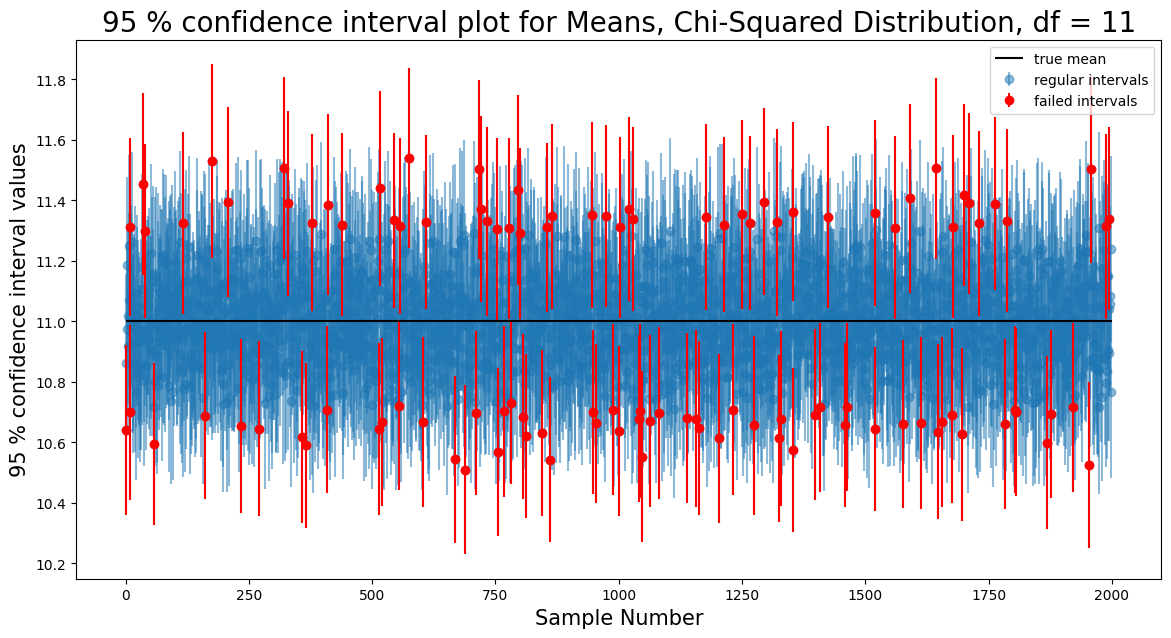

In [7]:
fig = plt.figure(figsize = (14,7));
#plot all sample CI's (translucent so excluded will be more visible)
plt.errorbar(x = np.arange(len(samples[:])), y = conf_invs[:,1], yerr = conf_invs[:,2] - conf_invs[:,1], zorder = 1, fmt = 'o', alpha = 0.5, label = 'regular intervals')

#Get exclusionary confidence intervals
ex_conf_invs = conf_invs[(conf_invs[:,0] > 11) | (conf_invs[:,2] < 11)]

#plot sample CI's that exclude confidence interval (more visibly)
plt.errorbar(x = arr_miss, y = ex_conf_invs[:,1], yerr = ex_conf_invs[:,2] - ex_conf_invs[:,1], zorder = 2, fmt = 'o', color = 'red', label = 'failed intervals')

#plot mean
plt.hlines(xmin = 0 , xmax = len(samples), y = 11, zorder = 3, color = 'black', label = 'true mean')
plt.xlabel("Sample Number", fontsize = 15)
plt.ylabel("95 % confidence interval values", fontsize = 15)
plt.title("95 % confidence interval plot for Means, Chi-Squared Distribution, df = 11", fontsize = 20)
plt.legend()
plt.show()